<a href="https://colab.research.google.com/github/ValeriaMendezC/Repositorio/blob/main/project8_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración inicial de los datos

In [878]:
!pip install squarify
import squarify as sq
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import pandas as pd
import pickle as pkl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv("https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_2.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [879]:
data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [880]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [881]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [882]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [883]:
data.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

# Limpieza de datos

In [884]:

data.duplicated().sum()

0

In [885]:
data.isnull()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [886]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [887]:
#Outliers Credit_Limit
cred=data.loc[::1,"Credit_Limit"]
q1c=cred.quantile(0.25)
q3c=cred.quantile(0.75)
rqc=q3c-q1c #rango intercuartilico
limsc=(1.5*rqc)+q3c #limite superior
limic=q1c-1.5*rqc
liminfc=max(cred.min(),limic) #limite inferior
wc=cred[(cred>limsc)].index
no_outc=cred[~cred.index.isin(wc)]
no_outc.describe()

count     9143.000000
mean      6165.293350
std       5229.540708
min       1438.300000
25%       2444.500000
50%       3908.000000
75%       8376.500000
max      23760.000000
Name: Credit_Limit, dtype: float64

In [888]:
outliers_2=no_outc[no_outc<min([liminfc])]
outliers_2

Series([], Name: Credit_Limit, dtype: float64)

In [889]:
#Outliers Months_on_book
book=data.loc[::1,'Months_on_book']
q1b=book.quantile(0.25)
q3b=book.quantile(0.75)
rqb=q3b-q1b #rango intercuartilico
limsb=(1.5*rqb)+q3b #limite superior
limib=q1b-1.5*rqb
wb=book[(book>limsb)].index
no_outb=book[~book.index.isin(wb)]
out=no_outb[no_outb<min([liminfb])]

In [890]:
data_2=data.copy()
data_2["Months_on_book"]=no_outb

In [891]:
data_2["Credit_Limit"]=no_outc

In [892]:
data=data_2.dropna().reset_index(drop=True)

In [893]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8951 entries, 0 to 8950
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           8951 non-null   int64  
 1   Attrition_Flag                                                                                                                      8951 non-null   object 
 2   Customer_Age                                                                                                                        8951 non-null   int64  
 3   Gender                                                                             

In [894]:
c = data.select_dtypes('object').columns
for col in c:
  data[c] = data[c].astype('category')

d = data.select_dtypes('int64').columns
for col in d:
  data[d] = data[d].astype('int8')

In [895]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8951 entries, 0 to 8950
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype   
---  ------                                                                                                                              --------------  -----   
 0   CLIENTNUM                                                                                                                           8951 non-null   int8    
 1   Attrition_Flag                                                                                                                      8951 non-null   category
 2   Customer_Age                                                                                                                        8951 non-null   int8    
 3   Gender                                                                        

#Análisis descriptivo y gráfico de los datos

In [896]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000,8951.000000
mean,1.146576,45.965702,2.358061,35.507206,3.843705,2.343649,2.447995,6167.953022,-3.630544,5012.762429,0.759567,-0.428109,63.896883,0.712930,0.299653,0.160555,0.839445
std,74.097429,7.852256,1.285824,7.674956,1.542701,1.010389,1.103349,5237.674195,62.962652,5260.037092,0.219668,73.698952,24.790631,0.238087,0.278131,0.365831,0.365831
min,-128.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,-128.000000,3.000000,0.000000,-128.000000,-128.000000,0.000000,0.000000,0.000008,0.000420
25%,-62.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2440.500000,-43.000000,1154.500000,0.630500,-64.000000,45.000000,0.583000,0.031000,0.000099,0.999660
50%,2.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3908.000000,0.000000,2835.000000,0.735000,0.000000,67.000000,0.702000,0.219000,0.000183,0.999820
75%,66.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,8383.000000,33.000000,7258.500000,0.858000,63.000000,80.000000,0.821000,0.537000,0.000339,0.999900
max,127.000000,73.000000,5.000000,53.000000,6.000000,6.000000,6.000000,23760.000000,127.000000,23742.000000,3.397000,127.000000,127.000000,3.714000,0.999000,0.999580,0.999990


<BarContainer object of 7 artists>

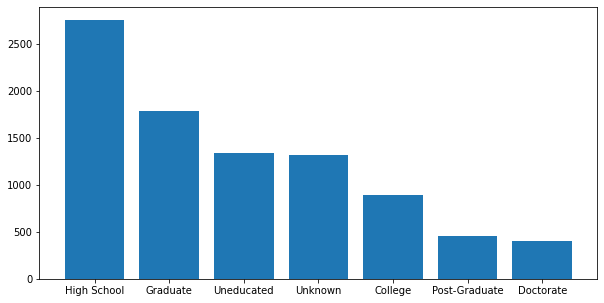

In [897]:
educacion = data['Education_Level'].value_counts()
educacion.index = ['High School','Graduate','Uneducated','Unknown','College','Post-Graduate','Doctorate']
f, ax = plt.subplots(figsize = (10,5))
plt.bar(educacion.index, educacion.values)

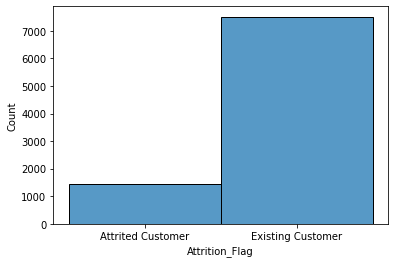

In [898]:
estado = data['Attrition_Flag'].value_counts()
estado.index = ['Existing Customer','Attrited Customer']
sns.histplot(x=data['Attrition_Flag'])


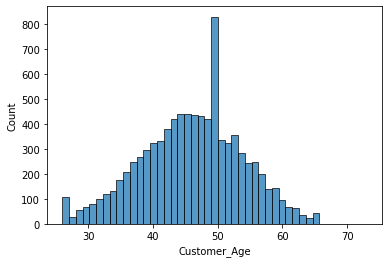

In [899]:
sns.histplot(x=data['Customer_Age'])
plt.savefig('Img1.png')

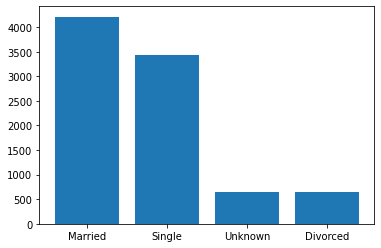

In [900]:
estado_civil = data['Marital_Status'].value_counts()
estado_civil.index = ['Married','Single','Unknown','Divorced']
plt.bar(estado_civil.index, estado_civil.values)

plt.savefig('Img2.png')

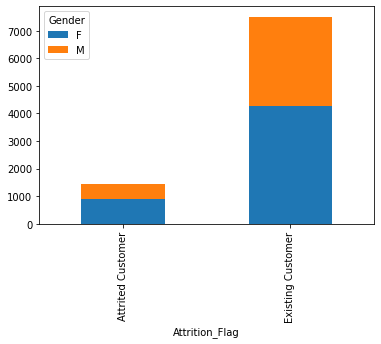

In [901]:
(data.groupby(['Attrition_Flag','Gender'])['Months_on_book']
 .count()
 .reset_index()
 .pivot(index='Attrition_Flag',values='Months_on_book',columns='Gender')
 .plot(kind='bar',stacked=True))

plt.savefig('Img3.png')

<BarContainer object of 6 artists>

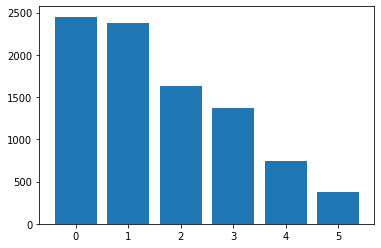

In [902]:
dependencia = data['Dependent_count'].value_counts()
dependencia.index = ['0','1','2','3','4','5']
plt.bar(dependencia.index, dependencia.values)

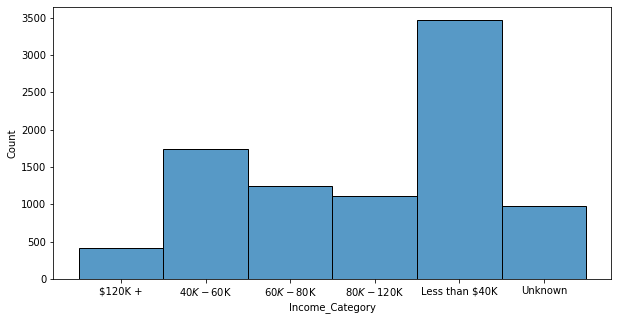

In [903]:
f, ax = plt.subplots(figsize = (10,5))
sns.histplot(x=data['Income_Category'])
plt.savefig('Img4.png')


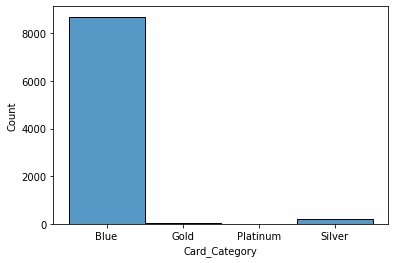

In [904]:
sns.histplot(x=data['Card_Category'])
plt.savefig('Img5.png')

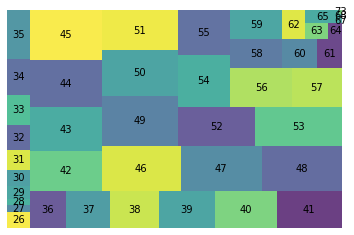

In [905]:
c = data.groupby('Customer_Age')[['Months_on_book']].sum().index.get_level_values(0).tolist()
e = data.groupby('Customer_Age')[['Months_on_book']].sum().reset_index().Months_on_book.values.tolist()
sq.plot(sizes=e, label=c, alpha=(.8))
plt.axis('off')
plt.show()

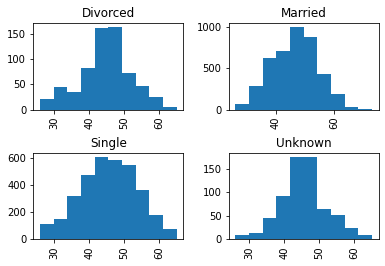

In [906]:
grafica_2 = data.hist('Customer_Age','Marital_Status')

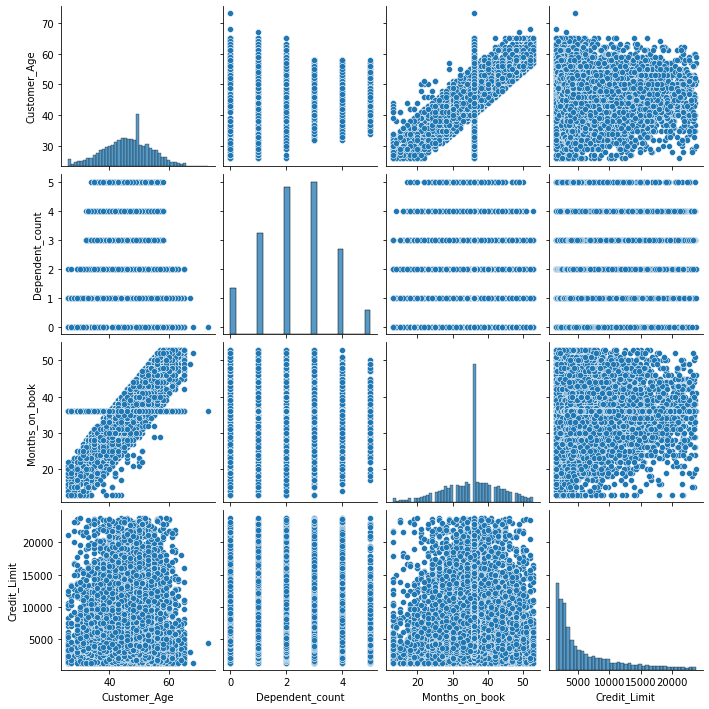

In [907]:
df2 = data[["Customer_Age","Gender","Dependent_count","Education_Level","Months_on_book",
              "Marital_Status","Income_Category","Card_Category","Credit_Limit"]]
sns.pairplot(df2)

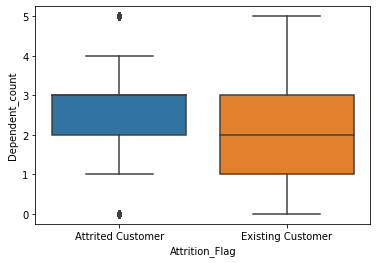

In [908]:
sns.boxplot(data=data, y="Dependent_count", x="Attrition_Flag")

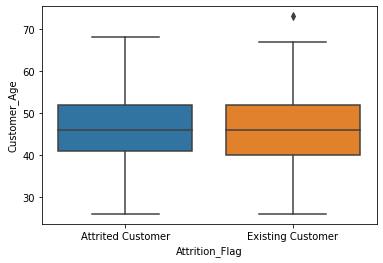

In [909]:
sns.boxplot(data=data, y="Customer_Age", x="Attrition_Flag")

En primer lugar se observa que la mayor cantidad de personas (más de 3000) poseen un nivel educativo de secundaria, así mismo menos de 500 personas llevan a un nivel de doctorado.  De todas estas personas se evidencia que la mayor concentración se encuentra entre los 40 y 50 años, lo que concuerda con las expectativas de un historial crediticio y la forma en la que este mercado se adapta a los clientes. 

Aunque no se observa una amplia diferencia, es evidente que la mayoría de personas son de género masculino, y de toda la muestra también predominan las personas con ingresos por debajo de 40k con una amplia diferencia frente a las demás categorías. 

Se evidencia una mayor presencia de personas en el grupo de clientes existentes, lo que refleja que el mercado analizado es ampliamente activo en el momento en el que se realizó el estudio. Se concluye también que entre los clientes inactivos predomina el género femenino. 


Los clientes presentes en el análisis son principalmente casados, siendo la mayoría de más de 4000 clientes, concordando con los rangos de edad de la muestra así como los registros de vida crediticia. Se obtiene también que la mayoría de clientes muestran preferencia por la blue card, debido probablemente a la forma en la que esta tarjeta se adapta más precisamente a sus necesidades como clientes, siendo notoria la diferencia con los usuarios que cuentan con la silver card, gold card o platinum card.


Se observa que no necesariamente a mayor edad las personas presentan mayor cantidad de meses como clientes del banco, las personas de 48 años son los que llevan un mayor periodo de tiempo con algún producto, mientras que las personas de 27 años son el grupo con menor presencia en la otra variable, concluyendo que no hay existe una clara tendencia que indique que a mayor edad, mayor meses en relación con un producto bancario. 

Conclusión general: 

Para concluir, en ocasiones se evidenció que la claridad de los datos no es la más adecuada, puesto que había unas variables que poco le aportaban al estudio realizado, también, las variables que se correlacionaban eran pocas, lo que dificultaba llegar a una conclusión sobre los factores que afectaban a las variables,también, se observó una clara propensión de las variables hacia el rango de edad de 40 a 50, lo que mostraría una falta de variables que permitan reducir esta propensión de datos hacia este grupo de edades.

#Preparación de datos

In [910]:
data.replace({'Attrition_Flag':{'Existing Customer':1,'Attrited Customer':0},
              'Gender':{'M':1,'F':0},
              'Marital_Status':{'Single':0,'Married':1,'Divorced':0,'Unknown':0},
              'Education_Level':{'Uneducated':0,'High School':1, 'College':2,'Graduate':3,'Post-Graduate':4, 'Doctorate':5,'Unknown':6},
              'Income_Category':{'Unknown':0,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5},
              'Card_Category':{'Blue':0,'Gold':1,'Silver':2,'Platinum':3}},inplace=True)

In [911]:
y = data['Attrition_Flag']
X = data.filter(['Gender','Marital_Status','Customer_Age','Education_Level','Months_on_book','Income_Category','Card_Category',
                 'Total_Relationship_Count','Months_Inactive_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
                 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'])

#  Optimización de Hiperparametros

In [912]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [913]:
param_grid = {"criterion":["gini", "entropy"],
              "splitter":["best", "random"],
              'max_depth':[5,10,15]}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


#Entrenamiento del modelo 

In [914]:
clsr = DecisionTreeClassifier(random_state=3, max_depth= 5)
clsr.fit(X_train, y_train)

y_pred = clsr.predict(X_test)
y_fit_train = clsr.predict(X_train)

#Evaluación de las métricas

In [915]:
def metricas_clas(y_true, y_pred):
  print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
  print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
  print(f"Recall: {recall_score(y_true, y_pred,average='weighted')}")

In [916]:
print('---'*10)
print('Métricas en entrenamiento')
print('---'*10)
metricas_clas(y_train, y_fit_train)
print('---'*10)
print('Métricas en testeo')
print('---'*10)
metricas_clas(y_test, y_pred)

------------------------------
Métricas en entrenamiento
------------------------------
Accuracy: 0.9206703910614525
Precision: 0.9169660010299814
Recall: 0.9206703910614525
------------------------------
Métricas en testeo
------------------------------
Accuracy: 0.9067560022333891
Precision: 0.9011154952333118
Recall: 0.9067560022333891


[[ 168  113]
 [  54 1456]]


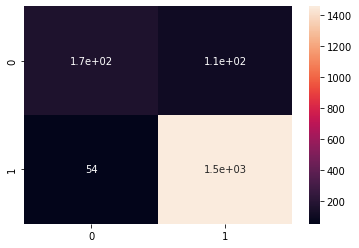

In [917]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.savefig('Img6.png')

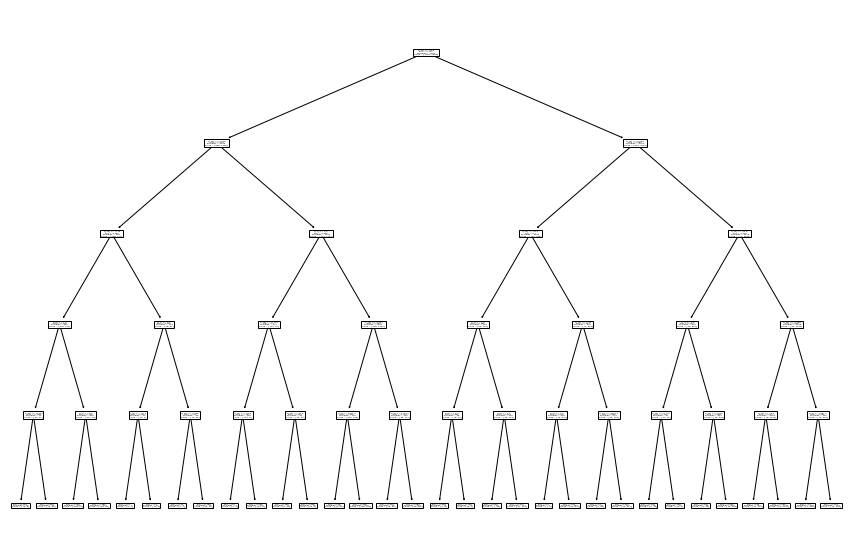

<Figure size 432x288 with 0 Axes>

In [918]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
tree.plot_tree(clsr, ax=ax)
plt.show()
plt.savefig('Img7.png')

In [919]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       281
           1       0.93      0.96      0.95      1510

    accuracy                           0.91      1791
   macro avg       0.84      0.78      0.81      1791
weighted avg       0.90      0.91      0.90      1791



In [920]:
#Se concluye que el modelo es significativamente mas preciso en la clasificación de unos que en la de ceros 

In [921]:
!pip install wooldridge shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [922]:
explainer = shap.Explainer(clsr.predict, X_test)
shap_values = explainer(X_test)


Permutation explainer: 1792it [01:10, 22.58it/s]                          


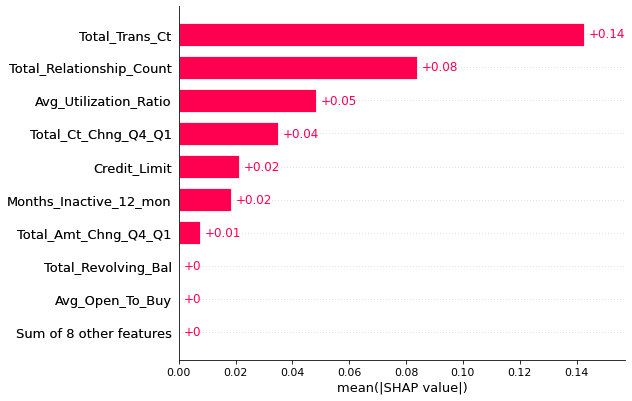

<Figure size 432x288 with 0 Axes>

In [923]:
shap.plots.bar(shap_values)
plt.savefig('Img8.png')

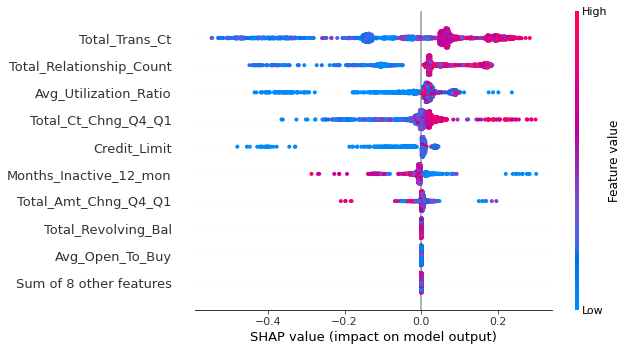

<Figure size 432x288 with 0 Axes>

In [924]:
shap.plots.beeswarm(shap_values)
plt.savefig('Img9.png')

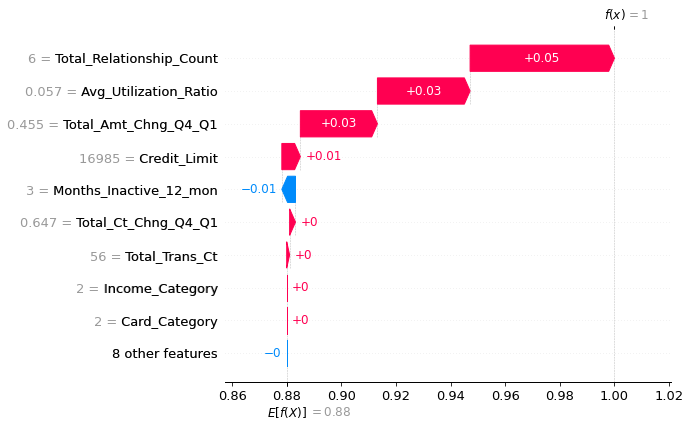

<Figure size 432x288 with 0 Axes>

In [925]:
shap.plots.waterfall(shap_values[0])
plt.savefig('Img10.png')

In [926]:
#Las variables que tienen mayor insidencia en el modelo son el recuento total de transacciones, el indice de uso promedio de la tarjeta y la cantidad total de productos que posee el cliente 

#Guarde el modelo

In [927]:
clsr_pickle = open ("clsr_randomforest.pickle","wb")
pkl.dump(clsr,clsr_pickle)
clsr_pickle.close()